In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df1 = pd.read_csv('listings_LA.csv')
print(f"The dataset contains {len(df1)} Airbnb listings")
## Extension: I want to import more cities to add data, then random sample and merge DFs as "df"
#df2 = pd.read_csv('listings_Austin.csv')
#df3 = pd.read_csv('listings_Boston.csv')
#df4 = pd.read_csv('listings_Cambridge.csv')
#df5 = pd.read_csv('listings_Chicago.csv')
#df6 = pd.read_csv('listings_Columbus.csv')
#df7 = pd.read_csv('listings_Denver.csv')
#df8 = pd.read_csv('listings_Hawaii.csv')
#df9 = pd.read_csv('listings_Jersey.csv')
#df10 = pd.read_csv('listings_Ashville.csv')
#df11 = pd.read_csv('listings_Miami.csv')
#df12 = pd.read_csv('listings_Nashville.csv')
#df13 = pd.read_csv('listings_NO.csv')
#df14 = pd.read_csv('listings_NYC.csv')
#df15 = pd.read_csv('listings_Oakland.csv')
#df16 = pd.read_csv('listings_Portland.csv')



The dataset contains 38851 Airbnb listings


/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Getting to know what the raw database looks like:

In [2]:
pd.set_option('display.max_columns', None)
df1.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20200213032707,2020-02-13,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...",none,NaN,NaN,NaN,NaN,NaN,Camelot NEW RESIDENTS’ GENERAL INFORMATION F...,NaN,NaN,https://a0.muscache.com/im/pictures/4321499/1d...,NaN,521,https://www.airbnb.com/users/show/521,Paolo,2008-06-27,"San Francisco, California, United States",Search for me on the Internet with the keyword...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/521/profile_p...,https://a0.muscache.com/im/users/521/profile_p...,Culver City,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Culver City, CA, United States",Culver City,Culver City,Other Cities,Culver City,CA,90230,Los Angeles,"Culver City, CA",US,United States,33.98209,-118.38494,t,Condominium,Entire home/apt,6,2.0,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$122.00,$904.00,"$2,851.00",$500.00,$240.00,3,$25.00,30,730,30,30,730,730,30.0,730.0,3 days ago,t,0,0,0,0,2020-02-13,2,0,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,f,NaN,"{""Culver City"","" CA""}",f,f,strict_14_with_grace_period,t,f,1,1,0,0,0.02
1,344,https://www.airbnb.com/rooms/344,20200213032707,2020-02-13,Family perfect;Pool;Near Studios!,This home is perfect for families; aspiring ch...,"Cheerful & comfortable; near studios, amusemen...",This home is perfect for families; aspiring ch...,none,Quiet-yet-close to all the fun in LA! Hollywoo...,"One dog may be on premises, friendly and cared...",Short drive to subway and elevated trains runn...,"Pool, patio and self-contained main house all ...",Host and caretaker may be available throughout...,Host asks that guests refrain from partying lo...,NaN,NaN,https://a0.muscache.com/im/pictures/cc4b724d-d...,NaN,767,https://www.airbnb.com/users/show/767,Melissa,2008-07-11,"Burbank, California, United States","Single mother, CEO and Owner of an internation...",within a day,75%,29%,f,https://a0.muscache.com/im/users/767/profile_p...,https://a0.muscache.com/im/users/767/profile_p...,Burbank,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'kba', ...",t,t,"Burbank, CA, United 

For now, I am keeping things simple by just looking at LA listings, but I'm keeping the option open to eventually sample from different cities and then merge them into one df!

# Cleaning the data

In [3]:
df = df1
df.set_index('id', inplace=True) # setting index to listing id as this may help if joining with other dataset
df.columns

Index(['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=105)

### Text columns 

In a future extension of this project, I could potentially investigate the text columns using some NLP techniques, sentiment analysis or Word2Vec clustering to potentially help the accuracy of the prediction. But for now, I'm a newbie and this is my first DS project! That being said, I will remove free text columns that I won't be using in this analysis:

In [4]:
cols_to_drop = ['scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'calendar_last_scraped']
df = df.drop(cols_to_drop, axis=1)


In [5]:
len(df.columns)

79

This already removes about 20% of the original columns, further simplifying the database. 

### Dropping NaN heavy columns
I also want to get rid of very sparse columns as they won't do a good job contributing to the model

In [6]:
df.isna()

,listing_url,experiences_offered,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
344,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
2708,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2732,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2864,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

By inspection, it looks like the following columns have a higher number of NaN values and will not necessarily help our model, so they will be dropped

In [7]:
print(df['license'].isna().sum(), 
      df['square_feet'].isna().sum(),
      df['host_acceptance_rate'].isna().sum(),
      df['jurisdiction_names'].isna().sum(),
      df['weekly_price'].isna().sum(),
      df['monthly_price'].isna().sum()
     )

29412 38568 5837 12074 35096 35335


In [8]:
df.drop(['license', 'square_feet', 'host_acceptance_rate', 'jurisdiction_names', 
         'weekly_price', 'monthly_price'], axis=1, inplace=True) 

The following columns are highly correlated to the column "host_listings_count" (the first one "host_total_listings_count" being exactly the same except for in 2 columns with NaN as the value), so they will not provide additional information for the prediction. Drop!

In [9]:
df.drop(['host_total_listings_count', 'calculated_host_listings_count', 
         'calculated_host_listings_count_entire_homes', 
         'calculated_host_listings_count_private_rooms', 
         'calculated_host_listings_count_shared_rooms'], axis=1, inplace=True)

### Price column
As we will want to predict the nightly price of the listing with accuracy, I will convert the nightly "Price" column into an integer value, as right now it is a string with symbol "$" in front.


In [10]:
df.price.head()

id
109     $122.00
344     $168.00
2708     $79.00
2732    $140.00
2864     $80.00
Name: price, dtype: object

In [11]:
##change prices to float values
df.price = df.price.str[1:-3]
df.price = df.price.str.replace(",", "")
df.price = df.price.astype('int64')
df.price.head()

id
109     122
344     168
2708     79
2732    140
2864     80
Name: price, dtype: int64

Inspecting min and max values of our target to get a sense of our range:

In [12]:
df.price.max()

22000

This seems like a very high nightly price, so it may be worth investigating to see if this is an extreme outlier to the dataset.

In [13]:
#find listing with max price
df[df.price == 22000]

,listing_url,experiences_offered,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20470360,https://www.airbnb.com/rooms/20470360,none,2014-11-07,a few days or more,30%,f,42.0,t,t,"Los Angeles, CA, United States",Bel Air/Beverly Crest,Hollywood Hills West,City of Los Angeles,Los Angeles,CA,90069,Los Angeles,"Los Angeles, CA",US,United States,34.10198,-118.36703,f,Villa,Entire home/apt,18,10.5,8.0,10.0,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Free...",22000,"$150,000.00",NaN,18,$0.00,1,1125,7,7,1125,1125,7.0,1125.0,7 months ago,t,28,58,88,363,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,f,luxury_moderate,f,f,NaN
27781015,https://www.airbnb.com/rooms/27781015,none,2014-11-07,a few days or more,30%,f,42.0,t,t,"Beverly Hills, CA, United States",Beverly Hills,Beverly Hills,Other Cities,Beverly Hills,CA,90210,Los Angeles,"Beverly Hills, CA",US,United States,34.09396,-118.41466,f,Villa,Entire home/apt,14,6.5,7.0,5.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",22000,"$100,000.00",NaN,14,$0.00,1,1125,30,30,1125,1125,30.0,1125.0,7 months ago,t,29,59,89,364,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,f,luxury_moderate,f,f,NaN


Afer using the listing URLs to search these, these are verified prices (holy crap!) and are part of the "Luxury Retreats" section of AirBnB I wasn't aware existed... Check them out, they are gorgeous!

In [14]:
df.price.min()

0

I find it really weird that there would be listings with a price of $0. This could be an entry mistake...

In [15]:
#find the listing with $0/night price
df[df.price == 0]

,listing_url,experiences_offered,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18506601,https://www.airbnb.com/rooms/18506601,none,2013-01-22,within an hour,100%,t,3.0,t,t,"Long Beach, CA, United States",Long Beach,Long Beach,Other Cities,Long Beach,CA,90807,Los Angeles,"Long Beach, CA",US,United States,33.82912,-118.20102,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",0,$200.00,$50.00,2,$100.00,1,1125,1,1,1125,1125,1.0,1125.0,4 days ago,t,2,32,62,337,70,34,2017-07-09,2020-02-10,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,moderate,f,f,2.21
18562002,https://www.airbnb.com/rooms/18562002,none,2017-05-04,NaN,NaN,f,1.0,t,t,"Los Angeles, CA, United States",Culver City,Culver City,Other Cities,Los Angeles,CA,90066,Los Angeles,"Los Angeles, CA",US,United States,33.99522,-118.43324,f,House,Entire home/apt,7,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",0,$400.00,$100.00,6,$10.00,1,1125,1,1,1125,1125,1.0,1125.0,27 months ago,t,0,0,0,0,16,0,2017-05-05,2017-11-26,94.0,9.0,9.0,10.0,9.0,10.0,9.0,f,f,f,strict_14_with_grace_period,f,f,0.47
21099870,https://www.airbnb.com/rooms/21099870,none,2017-09-25,within an hour,100%,t,2.0,t,f,"Gardena, CA, United States",Harbor Gateway,Harbor Gateway,City of Los Angeles,Gardena,CA,90248,Los Angeles,"Gardena, CA",US,United States,33.86413,-118.29326,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,""Free parking on premises""...",0,$100.00,$20.00,1,$20.00,1,1125,1,1,1125,1125,1.0,1125.0,3 days ago,t,0,1,13,288,32,12,2017-10-15,2019-09-15,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,f,f,strict_14_with_grace_period,f,f,1.13
21187671,https://www.airbnb.com/rooms/21187671,none,2015-04-18,within an hour,100%,f,10.0,t,f,"Los Angeles, CA, United States",Van Nuys,Van Nuys,City of Los Angeles,Los Angeles,CA,91405,Los Angeles,"Los Angeles, CA",US,United States,34.19718,-118.44036,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",0,$0.00,$100.00,1,$0.00,30,150,30,30,1125,1125,30.0,1125.0,2 months ago,t,0,0,0,164,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,t,f,strict_14_with_grace_period,f,f,NaN
29421142,https://www.airbnb.com/rooms/29421142,none,2016-12-03,within an hour,100%,t,3.0,t,f,"Los Angeles, CA, United States",Toluca Lake,North Hollywood,City of Los Angeles,Los Angeles,CA,91601,Los Angeles,"Los Angeles, CA",US,United States,34.16589,-118.35716,f,House,Entire home/apt,7,1.5,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",0,$250.00,$145.00,4,$15.00,30,120,30,30,120,120,30.0,120.0,2 months ago,t,0,12,41,41,8,7,2019-01-03,2020-02-01,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,f,f,moderate,f,f,0.59


After searching the host URLs for each of these 5 listings, it turns out there is a nonzero price for all. Because there are only 5 of them, it was easy to verify the actual prices. If there were more, I would not have known why!! I know I have plenty of data, but for practice with indexing and using .loc to access entries, I'm going to replace these with the verified prices as of 03-13-20.

In [16]:
df.loc[df.index == 18506601, 'price'] = 70.0
df.loc[df.index == 18506601, 'price']

id
18506601    70.0
Name: price, dtype: float64

In [17]:
df.loc[df.index == 18562002, 'price'] = 189.0
df.loc[df.index == 21099870, 'price'] = 57.0
df.loc[df.index == 21187671, 'price'] = 95.0
df.loc[df.index == 29421142, 'price'] = 150.0

In [18]:
#check
len(df[df.price == 0])

0

Look at distribution of nightly prices:

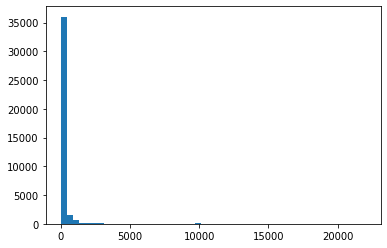

In [19]:
plt.hist(df.price,bins=50)
plt.show()

Because the amount of listings above $5000/night is less than 1% of the entire dataset, it may be best to inspect the distribution for listings below that price.

In [20]:
len(df[df.price>=2500])/len(df)

0.00967800056626599

This gives us a better view of what's going on with the distribution of prices:

(0, 2500.0)

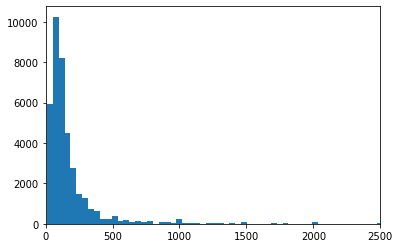

In [21]:
plt.hist(df.price, bins=500)
plt.xlim(right=2500)
plt.xlim(left=0)

In [22]:
df.price.median()

110.0

In [23]:
df.price.mean()

226.87318215747342

### Security Deposit, Cleaning Fee, Extra People
We will want to do the same thing for the security deposit, cleaning fee and extra people columns, but these ones have a lot of NaN values, which should just be zeros.

In [24]:
df.security_deposit.isna().sum()

9270

In [25]:
df.security_deposit = df.security_deposit.str[1:-3]
df.security_deposit = df.security_deposit.str.replace(",", "")
df.security_deposit.fillna(0, inplace=True)
df.security_deposit = df.security_deposit.astype('int64')
df.security_deposit.head()

id
109     500
344       0
2708    450
2732      0
2864    100
Name: security_deposit, dtype: int64

In [26]:
df.cleaning_fee = df.cleaning_fee.str[1:-3]
df.cleaning_fee = df.cleaning_fee.str.replace(",", "")
df.cleaning_fee.fillna(0, inplace=True)
df.cleaning_fee = df.cleaning_fee.astype('int64')
df.cleaning_fee.head()

id
109     240
344     100
2708     84
2732    100
2864     75
Name: cleaning_fee, dtype: int64

In [27]:
df.extra_people = df.extra_people.str[1:-3]
df.extra_people = df.extra_people.str.replace(",", "")
df.extra_people.fillna(0, inplace=True)
df.extra_people = df.extra_people.astype('int64')
df.extra_people.head()

id
109     25
344      0
2708     0
2732     0
2864    25
Name: extra_people, dtype: int64

## Location

We have multiple columns related to the location of the listings. We may be able to clear some of this redundant information, as well as save the latitude/longitude for future reference. I am also keeping city/state keeping in mind that I would want to extend this to multiple cities and it could be useful to have categorical location columns.

In [28]:
precise_location = df[['latitude', 'longitude']]

In [29]:
df.drop(['zipcode', 'street', 'state', 'market', 
         'smart_location', 'country_code', 'country', 'is_location_exact'], axis=1, inplace=True)

## Exploring Bedrooms and Property Information

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(-1.05, 10)

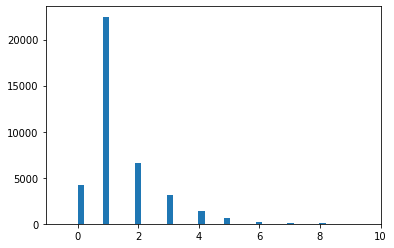

In [30]:
plt.hist(df.bedrooms, bins=100)
plt.xlim(right=10)

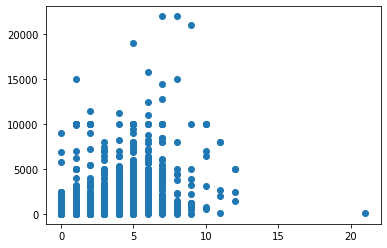

In [31]:
plt.scatter(df.bedrooms, df.price)

Looks like we have an outlier here on number of bedrooms. Let's inspect:

In [32]:
df[df.bedrooms >=20]

,listing_url,experiences_offered,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
39395189,https://www.airbnb.com/rooms/39395189,none,2019-10-15,within an hour,80%,f,0.0,t,f,Hollywood,Hollywood,City of Los Angeles,Los Angeles,34.10182,-118.33476,Hotel,Private room,2,0.0,21.0,1.0,Real Bed,"{TV,Wifi,Heating,""Smoke detector"",Shampoo,""Loc...",100.0,0,0,1,0,1,21,1,1,21,21,1.0,21.0,4 days ago,t,29,59,89,364,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,t,f,flexible,f,f,NaN


So this is a hotel listing, where they have entered the total number of hotel rooms as "bedrooms" but really it should be 1.0. How are other hotels listed?

In [33]:
df[df.property_type=='Hotel']

,listing_url,experiences_offered,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11374,https://www.airbnb.com/rooms/11374,none,2009-09-29,within an hour,100%,t,2.0,t,f,Gardena,Gardena,Other Cities,Los Angeles,33.90348,-118.29269,Hotel,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",""Wheelc...",80.0,100,0,1,10,1,7,1,1,7,7,1.0,7.0,yesterday,t,29,59,89,364,24,11,2011-04-14,2020-02-11,90.0,9.0,9.0,10.0,9.0,8.0,9.0,t,t,f,flexible,f,f,0.22
44511,https://www.airbnb.com/rooms/44511,none,2010-08-08,within a few hours,100%,f,8.0,t,t,Lynwood,Lynwood,Other Cities,Lynwood,33.91942,-118.20913,Hotel,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",""Free parking on p...",58.0,0,0,2,0,1,25,1,1,25,25,1.0,25.0,2 weeks ago,t,28,58,88,178,207,17,2011-03-07,2020-01-18,89.0,9.0,9.0,10.0,9.0,9.0,9.0,f,f,f,flexible,f,f,1.90
46699,https://www.airbnb.com/rooms/46699,none,2010-08-08,within a few hours,100%,f,8.0,t,t,Lynwood,Lynwood,Other Cities,Lynwood,33.91942,-118.20913,Hotel,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",""Free p...",58.0,0,0,1,0,1,25,1,1,25,25,1.0,25.0,2 weeks ago,t,29,59,89,179,177,29,2011-06-22,2020-01-27,92.0,9.0,9.0,10.0,10.0,9.0,9.0,f,f,f,flexible,f,f,1.68
84636,https://www.airbnb.com/rooms/84636,none,2010-08-08,within a few hours,100%,f,8.0,t,t,Lynwood,Lynwood,Other Cities,Lynwood,33.91942,-118.20913,Hotel,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",""Free parking on p...",58.0,0,0,1,0,1,25,1,1,25,25,1.0,25.0,5 months ago,t,26,56,86,176,210,27,2011-05-26,2020-02-02,90.0,10.0,9.0,10.0,10.0,9.0,10.0,f,f,f,flexible,f,f,1.98
97000,https://www.airbnb.com/rooms/97000,none,2010-08-08,within a few hours,100%,f,8.0,t,t,Lynwood,Lynwood,Other Cities,Lynwood,33.91942,-118.20913,Hotel,Private room,4,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",""Free p...",75.0,0,0,1,0,1,25,1,1,25,25,1.0,25.0,2 weeks ago,t,27,57,87,177,75,10,2011-08-22,2020-01-01,83.0,9.0,8.0,9.0,9.0,7.0,8.0,f,f,f,flexible,f,f,0.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42066070,https://www.airbnb.com/rooms/42066070,none,2019-08-02,NaN,NaN,f,6.0,t,f,Downtown,Downtown,City of Los Angeles,Los Angeles,34.05069,-118.25596,Hotel,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",""Pets all...",10000.0,0,0,1,0,1,5,1,1,5,5,1.0,5.0,a week ago,t,24,54,81,343,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,t,f,flexible,f,f,NaN
42066095,https://www.airbnb.com/rooms/42066095,none,2019-08-02,NaN,NaN,f,6.0,t,f,Downtown,Downtown,City of Los Angeles,Los Angeles,34.05049,-118.25772,Hotel,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Air conditioning"",""Pets allowed""...",10000.0,0,0,1,0,1,1125,1,1,1125,1125,1.0,1125.0,a we

In [34]:
df.loc[df.index == 39395189, 'bedrooms'] = 1.0
len(df[df.bedrooms >=15])

0

In [35]:
len(df.columns) #Check how many columns we have reduced to

60

## Property Type

We have a lot of property types that don't have very many values in them, and categories that could be grouped together as a type of house, apartment, or "other" more unique places to stay.

In [36]:
df.property_type.value_counts()

House                     13745
Apartment                 12944
Condominium                2416
Guesthouse                 2153
Guest suite                1501
Townhouse                  1219
Bungalow                   1016
Villa                       981
Loft                        748
Serviced apartment          515
Boutique hotel              271
Hostel                      182
Cottage                     178
Aparthotel                  168
Camper/RV                   154
Bed and breakfast           130
Tiny house                   95
Other                        92
Hotel                        67
Cabin                        63
Farm stay                    34
Earth house                  22
Castle                       21
Boat                         20
Dome house                   17
Campsite                     15
Treehouse                    12
Tent                         10
Barn                         10
Chalet                        9
Dorm                          7
Yurt    

In [37]:
#We can group together the categories that are all classifications of house/apartment
df.property_type.replace({
    'Townhouse': 'House',
    'Bungalow': 'House',
    'Cottage': 'House',
    'Villa': 'House',
    'Tiny house': 'House',
    'Earth house': 'House',
    'Chalet': 'House',
    'Guesthouse' : 'House',
    'Serviced apartment': 'Apartment',
    'Loft': 'Apartment',
    'Aparthotel' : 'Apartment',
    'Condominium' : 'Apartment',
    }, inplace=True)

df.loc[~df.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'

In [38]:
df.property_type.value_counts()

House        19418
Apartment    16791
Other         2642
Name: property_type, dtype: int64

### Bathrooms, Bedrooms, Beds

We will replace missing values with the median value of each. For bed_type, most have a real bed so this won't do much for our model

In [39]:
for col in ['bathrooms', 'bedrooms', 'beds']:
    df[col].fillna(df[col].median(), inplace=True)

In [40]:
df.bed_type.value_counts()

Real Bed         38491
Futon              143
Pull-out Sofa       87
Airbed              73
Couch               57
Name: bed_type, dtype: int64

In [41]:
df.drop('bed_type', axis=1, inplace=True)

# Storytelling
Less reviewed on higher priced listings -- makes sense

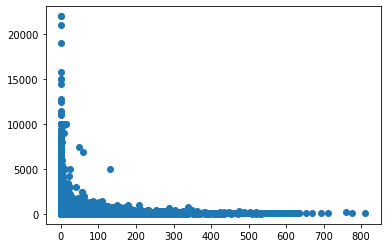

In [42]:
plt.scatter(df.number_of_reviews, df.price)

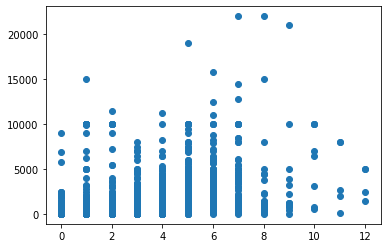

In [48]:
plt.scatter(df.bedrooms, df.price)

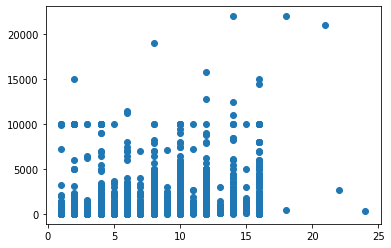

In [51]:
plt.scatter(df.accommodates, df.price)